# Chatgpt4o

## Prompt

Create a Pong game in Python that runs inside a Jupyter Notebook.
The game should be single-player:
– The player controls a paddle using the up and down arrow keys
– The opponent (computer) should move logically, e.g. by tracking the ball with some delay
– Include a score display for both the player and the opponent
– Use pygame or tkinter for drawing and animation, ensuring compatibility with Jupyter Notebooks
– The game should run entirely within a single notebook cell
– Use pygame.display.set_mode((width, height)) and set a window caption using pygame.display.set_caption()
– If needed, adapt the setup for Jupyter compatibility (e.g. use %matplotlib, pygame.display.init(), or similar)
– Make sure the game runs in a loop and can be exited with the ESC key or after a certain score is reached


## Code-Analyse

Chatgpt4o nutzt die pygame - Bibiliothek, diese muss erst installiert werden

In [2]:
! pip install pygame


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Seyit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pygame
import random
import time
from IPython.display import display, clear_output

# Initialize pygame
pygame.init()

# Set game display size and caption
WIDTH, HEIGHT = 600, 400
FPS = 60
win = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pong Game")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)

# Paddle class
class Paddle:
    def __init__(self, x, y):
        self.rect = pygame.Rect(x, y, 15, 75)  # Paddle size (15px width, 75px height)
        self.speed = 6  # Paddle speed
    
    def move(self, direction):
        if direction == 'up' and self.rect.top > 0:
            self.rect.y -= self.speed
        elif direction == 'down' and self.rect.bottom < HEIGHT:
            self.rect.y += self.speed

    def draw(self, win):
        pygame.draw.rect(win, WHITE, self.rect)

# Ball class
class Ball:
    def __init__(self):
        self.rect = pygame.Rect(WIDTH // 2 - 7, HEIGHT // 2 - 7, 15, 15)
        self.dx = random.choice([-5, 5])
        self.dy = random.choice([-5, 5])

    def move(self):
        self.rect.x += self.dx
        self.rect.y += self.dy

    def draw(self, win):
        pygame.draw.ellipse(win, WHITE, self.rect)

    def reset(self):
        self.rect.center = (WIDTH // 2, HEIGHT // 2)
        self.dx = random.choice([-5, 5])
        self.dy = random.choice([-5, 5])

# Function to draw game elements
def draw_game(player, opponent, ball, player_score, opponent_score):
    win.fill(BLACK)
    
    # Draw paddles and ball
    player.draw(win)
    opponent.draw(win)
    ball.draw(win)
    
    # Draw the net (line in the middle)
    pygame.draw.line(win, WHITE, (WIDTH // 2, 0), (WIDTH // 2, HEIGHT), 2)
    
    # Display scores
    font = pygame.font.SysFont('Arial', 30)
    score_text = font.render(f"{player_score} - {opponent_score}", True, WHITE)
    win.blit(score_text, (WIDTH // 2 - score_text.get_width() // 2, 20))

    pygame.display.update()

# Function to move the opponent paddle (simple AI)
def move_opponent(opponent, ball):
    # Basic AI that follows the ball with a delay
    if opponent.rect.centery < ball.rect.centery:
        opponent.move('down')
    elif opponent.rect.centery > ball.rect.centery:
        opponent.move('up')

# Game loop
def pong_game():
    player = Paddle(10, HEIGHT // 2 - 35)  # Player on the left side
    opponent = Paddle(WIDTH - 25, HEIGHT // 2 - 35)  # Opponent on the right side
    ball = Ball()
    
    player_score = 0
    opponent_score = 0
    running = True
    
    clock = pygame.time.Clock()

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    running = False
                elif event.key == pygame.K_UP:
                    player.move('up')
                elif event.key == pygame.K_DOWN:
                    player.move('down')

        ball.move()

        # Ball collision with top and bottom
        if ball.rect.top <= 0 or ball.rect.bottom >= HEIGHT:
            ball.dy *= -1
        
        # Ball collision with paddles
        if ball.rect.colliderect(player.rect) or ball.rect.colliderect(opponent.rect):
            ball.dx *= -1
        
        # Scoring system
        if ball.rect.left <= 0:
            opponent_score += 1
            ball.reset()
        elif ball.rect.right >= WIDTH:
            player_score += 1
            ball.reset()

        # Move opponent (AI)
        move_opponent(opponent, ball)

        # Draw everything
        draw_game(player, opponent, ball, player_score, opponent_score)

        # If a player reaches a score of 5, end the game
        if player_score == 5 or opponent_score == 5:
            font = pygame.font.SysFont('Arial', 50)
            winner_text = font.render(f"{'Player' if player_score == 5 else 'Opponent'} Wins!", True, GREEN)
            win.blit(winner_text, (WIDTH // 2 - winner_text.get_width() // 2, HEIGHT // 2 - 50))
            pygame.display.update()
            time.sleep(2)
            running = False
        
        clock.tick(FPS)

# Start the game
pong_game()

# Quit pygame
pygame.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


Der Code implementiert ein Single-Player-Pong-Spiel mit pygame. Hier sind die wichtigsten Punkte der Funktionsweise:

Initialisierung:
Mit pygame.init() werden alle benötigten pygame-Module initialisiert. Das Spielfenster wird auf eine feste Größe von 600x400 Pixeln gesetzt, und der Fenstertitel wird auf "Pong Game" gesetzt.

Definition von Spielobjekten:
Es werden Konstanten für Farben (Weiß für Objekte, Schwarz für den Hintergrund und Grün für den Gewinnertext) sowie die Grundwerte für die Paddles und den Ball definiert. Die Paddle-Klasse enthält ein Paddle-Objekt mit einer festen Größe und Bewegungsgeschwindigkeit. Die Ball-Klasse definiert den Ball mit einer Startposition in der Mitte des Fensters und zufälligen Bewegungsrichtungen (dx und dy).

Spielschleife:
Die Spielschleife läuft kontinuierlich und strebt eine Aktualisierungsrate von 60 FPS an. In dieser Schleife werden folgende Aktionen ausgeführt:

Ereignisbehandlung:
Die Ereignisbehandlung überprüft, ob das Fenster geschlossen oder die ESC-Taste gedrückt wurde, um das Spiel zu beenden. Außerdem wird die Eingabe der Pfeiltasten überwacht, um das Spieler-Paddle nach oben oder unten zu bewegen.

Spielereingaben:
Mit der Abfrage von Tasteneingaben (pygame.KEYDOWN) wird das Spieler-Paddle nach oben oder unten bewegt. Die move()-Methode stellt sicher, dass das Paddle innerhalb der Fenstergrenzen bleibt.

Gegner-KI:
Das Gegner-Paddle bewegt sich in Richtung des Balls. Die einfache KI folgt der y-Position des Balls mit einer Verzögerung, was bedeutet, dass das Gegner-Paddle nicht sofort auf jede Bewegung des Balls reagiert, sondern eine kleine Verzögerung simuliert wird.

Ballbewegung und Kollision:
Der Ball wird in jedem Schritt der Schleife gemäß seiner Bewegungsrichtung (dx und dy) bewegt. Bei Kollision mit den oberen oder unteren Fensterrändern wird die Richtung des Balls auf der y-Achse umgekehrt. Bei Berührung eines Paddles (Spieler oder Gegner) wird die horizontale Bewegungsrichtung des Balls umgekehrt.

Punktestand:
Wenn der Ball die linke oder rechte Seite des Fensters überschreitet, wird der Punktestand aktualisiert und der Ball wird auf seine Ausgangsposition in der Mitte des Fensters zurückgesetzt. Das Spiel endet, wenn ein Spieler eine Punktzahl von 5 erreicht hat.

Anzeige:
Der Hintergrund wird in jeder Schleifeniteration neu gezeichnet, die Paddles, der Ball und der aktuelle Punktestand werden angezeigt. Der Punktestand wird oben im Fenster angezeigt und regelmäßig aktualisiert.

Spielende:
Wenn ein Spieler eine Punktzahl von 5 erreicht, wird ein Text "Player Wins!" oder "Opponent Wins!" in der Mitte des Fensters angezeigt. Das Spiel wartet für 2 Sekunden, bevor es beendet wird.

Spielabschluss:
Nach dem Ende des Spiels wird das pygame-Fenster geschlossen und alle pygame-Ressourcen freigegeben, indem pygame.quit() aufgerufen wird.

## Output

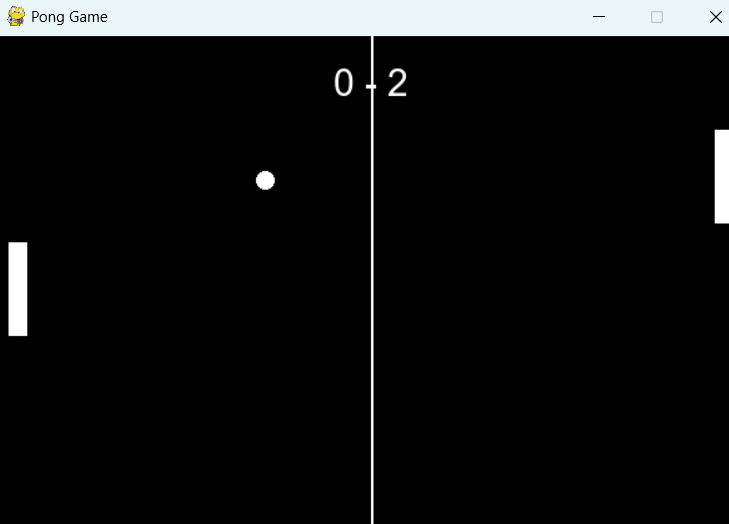

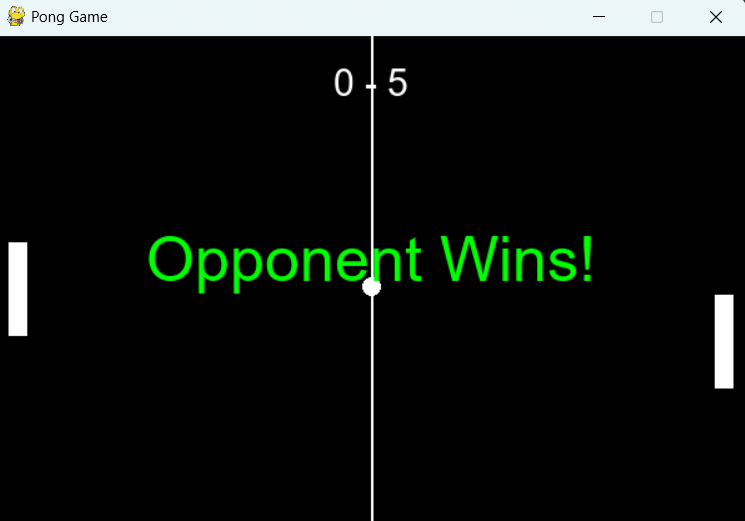

In [6]:
from IPython.display import Image, display

display(Image(filename='./pictures_pong_chatgpt4o/pong_game.png'))
display(Image(filename='./pictures_pong_chatgpt4o/pong_game_result.png'))

Das erstellte Spiel funktioniert einwandfrei und bietet eine reibungslose Single-Player-Erfahrung. Die Steuerung erfolgt über die Pfeiltasten nach oben und unten, um das Spieler-Paddle zu bewegen. Der Punktestand wird korrekt angezeigt und bei jedem Punktgewinn entsprechend erhöht. Die KI des Gegners ist jedoch relativ einfach und reagiert recht schnell, sodass es eine gewisse Herausforderung darstellt, den Ball am Gegner vorbeizubringen. Das Spiel endet, sobald ein Spieler eine Punktzahl von 5 erreicht hat, und das Ergebnis wird für einige Sekunden angezeigt, bevor das Spiel beendet wird.